<a href="https://colab.research.google.com/github/Haleema33/Image_classifier_for_flower/blob/main/Copy_of_AIPND_image_classifier_project_Part_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Part 1 --Vgg-16 Model


## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [ ]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Dataset already setup at ./flowers


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [ ]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [ ]:
# Check torch version and CUDA status if GPU is enabled.
import torch
print(torch.__version__)
print(torch.cuda.is_available()) # Should return True when GPU is enabled.

2.5.1+cu124
True


In [ ]:
# Imports here
# Importing necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os

In [ ]:
# Define dataset directories
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

# TODO: Define your transforms for the training, validation, and testing sets
# Define transformations for training, validation, and testing
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Random scaling and cropping
    transforms.RandomHorizontalFlip(),  # Random flipping
    transforms.RandomRotation(30),  # Random rotation
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])

valid_transforms = transforms.Compose([
    transforms.Resize(256),  # Resize to ensure a minimum size
    transforms.CenterCrop(224),  # Crop to required size (224x224)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),  # Resize to a consistent size
    transforms.CenterCrop(224),  # Crop to 224x224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
# TODO: Load the datasets with ImageFolder
# Load datasets with ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)



In [ ]:
# Load category label to category name mapping
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

# Create a class index mapping
class_to_idx = train_dataset.class_to_idx

# Reverse the mapping so we can get class labels from indices
idx_to_class = {v: k for k, v in class_to_idx.items()}

# Convert class index to flower name
def get_flower_name(class_idx):
    """Convert class index to actual flower name."""
    category = idx_to_class[class_idx]  # Convert index to category (e.g., '1', '2', ...)
    return cat_to_name.get(category, "Unknown Flower")  # Get flower name from JSON

In [ ]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load VGG16 Pretrained Model (138M parameters)
model = models.vgg16(pretrained=True)

# Freeze feature extractor layers
for param in model.features.parameters():
    param.requires_grad = False  # Keeps pretrained weights unchanged

# Define a new feedforward classifier (Replaces VGG16 fully connected layer)
model.classifier = nn.Sequential(
    nn.Linear(25088, 512),  # First hidden layer
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(512, 256),  # Second hidden layer
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(256, 102),  # Output layer (102 flower categories)
    nn.LogSoftmax(dim=1)  # Log probabilities for classification
)

# Move model to GPU if available
model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 69.8MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.classifier.parameters(), lr=0.0001)

print("VGG-16 Model Ready!")

VGG-16 Model Ready!


In [ ]:
# Training settings
epochs = 15
print_every = 50  # Print progress every 20 batches
steps = 0

# Training loop
for epoch in range(epochs):
    running_loss = 0
    model.train()  # Set model to training mode

    for images, labels in train_loader:
        steps += 1
        images, labels = images.to(device), labels.to(device)  # Move to GPU

        optimizer.zero_grad()  # Reset gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

        # Validate the model every `print_every` batches
        if steps % print_every == 0:
            model.eval()  # Set model to evaluation mode
            valid_loss = 0
            accuracy = 0

            with torch.no_grad():  # No gradient calculation in validation
                for images, labels in valid_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    valid_loss += loss.item()

                    # Calculate accuracy
                    probabilities = torch.exp(outputs)  # Convert log probabilities
                    top_p, top_class = probabilities.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train Loss: {running_loss/print_every:.3f}.. "
                  f"Valid Loss: {valid_loss/len(valid_loader):.3f}.. "
                  f"Valid Accuracy: {accuracy/len(valid_loader):.3f}")

            running_loss = 0  # Reset running loss
            model.train()  # Back to training mode

Epoch 1/15.. Train Loss: 1.880.. Valid Loss: 1.097.. Valid Accuracy: 0.747
Epoch 1/15.. Train Loss: 1.740.. Valid Loss: 0.963.. Valid Accuracy: 0.770
Epoch 2/15.. Train Loss: 1.565.. Valid Loss: 0.922.. Valid Accuracy: 0.789
Epoch 2/15.. Train Loss: 1.561.. Valid Loss: 0.817.. Valid Accuracy: 0.803
Epoch 3/15.. Train Loss: 1.325.. Valid Loss: 0.774.. Valid Accuracy: 0.820
Epoch 3/15.. Train Loss: 1.457.. Valid Loss: 0.757.. Valid Accuracy: 0.828
Epoch 4/15.. Train Loss: 1.167.. Valid Loss: 0.722.. Valid Accuracy: 0.827
Epoch 4/15.. Train Loss: 1.369.. Valid Loss: 0.664.. Valid Accuracy: 0.847
Epoch 5/15.. Train Loss: 1.015.. Valid Loss: 0.628.. Valid Accuracy: 0.849
Epoch 5/15.. Train Loss: 1.237.. Valid Loss: 0.576.. Valid Accuracy: 0.867
Epoch 6/15.. Train Loss: 0.868.. Valid Loss: 0.572.. Valid Accuracy: 0.860
Epoch 6/15.. Train Loss: 1.175.. Valid Loss: 0.566.. Valid Accuracy: 0.860
Epoch 7/15.. Train Loss: 0.718.. Valid Loss: 0.532.. Valid Accuracy: 0.869
Epoch 7/15.. Train Loss: 

In [ ]:
# TODO: Do validation on the test set
# Set model to evaluation mode
model.eval()

test_loss = 0
accuracy = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Accuracy calculation
        probabilities = torch.exp(outputs)
        top_p, top_class = probabilities.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

print(f"Test Loss: {test_loss/len(test_loader):.3f}.. "
      f"Test Accuracy: {accuracy/len(test_loader):.3f}")

Test Loss: 0.412.. Test Accuracy: 0.888


In [ ]:
# TODO: Save the checkpoint
# Save the model checkpoint

# Save model checkpoint
model.class_to_idx = train_dataset.class_to_idx

checkpoint = {
    'model_state_dict': model.state_dict(),
    'classifier': model.classifier,  # VGG-16 uses model.classifier instead of model.fc
    'class_to_idx': model.class_to_idx,
    'optimizer_state_dict': optimizer.state_dict(),
    'epochs': epochs
}

torch.save(checkpoint, '/content/checkpoint.pth')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)

    # Load VGG-16 model
    model = models.vgg16(pretrained=True)
    model.classifier = checkpoint['classifier']  # Assign saved classifier

    model.load_state_dict(checkpoint['model_state_dict'])
    model.class_to_idx = checkpoint['class_to_idx']
    model.to(device)

    return model

# Example: Load VGG-16 model
model = load_checkpoint('/content/checkpoint.pth')
print("VGG-16 model loaded successfully!")

<ipython-input-14-11add64bb60d>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)


VGG-16 model loaded successfully!


##Image Processing


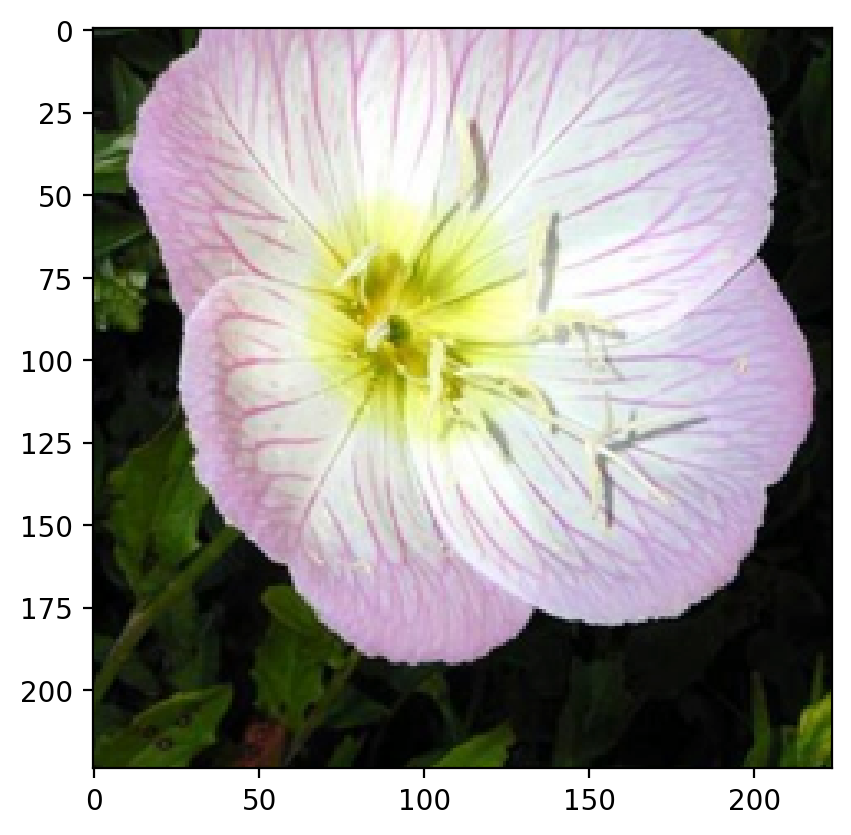

In [ ]:
def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns a Numpy array
    '''
    image = Image.open(image_path)

    # Resize image maintaining aspect ratio
    aspect_ratio = image.width / image.height
    if image.width < image.height:
        image = image.resize((256, int(256 / aspect_ratio)))
    else:
        image = image.resize((int(256 * aspect_ratio), 256))

    # Center crop to 224x224
    width, height = image.size
    left = (width - 224) / 2
    top = (height - 224) / 2
    image = image.crop((left, top, left + 224, top + 224))

    # Convert to numpy array and normalize
    np_image = np.array(image) / 255.0
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std

    # Transpose dimensions to match PyTorch format (C, H, W)
    np_image = np_image.transpose((2, 0, 1))

    return np_image

def imshow(image, ax=None, title=None):
    '''Display a PyTorch tensor as an image.'''
    if ax is None:
        fig, ax = plt.subplots()

    # Convert PyTorch tensor to numpy array
    image = image.numpy().transpose((1, 2, 0))

    # Undo normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)  # Clip values between 0 and 1

    ax.imshow(image)
    return ax

    import os


    import torch

image_path = "/content/flowers/test/1/image_06743.jpg"
processed_image = process_image(image_path)

# Convert to tensor before displaying
image_tensor = torch.tensor(processed_image)

imshow(image_tensor)  # Display image
plt.show()  # Ensure matplotlib renders it


#image = "/content/flowers/test/1/image_06743.jpg"
#print("File exists:", os.path.exists(image_path))


###Image Predication


Selected Image: /content/flowers/train/89/image_00626.jpg


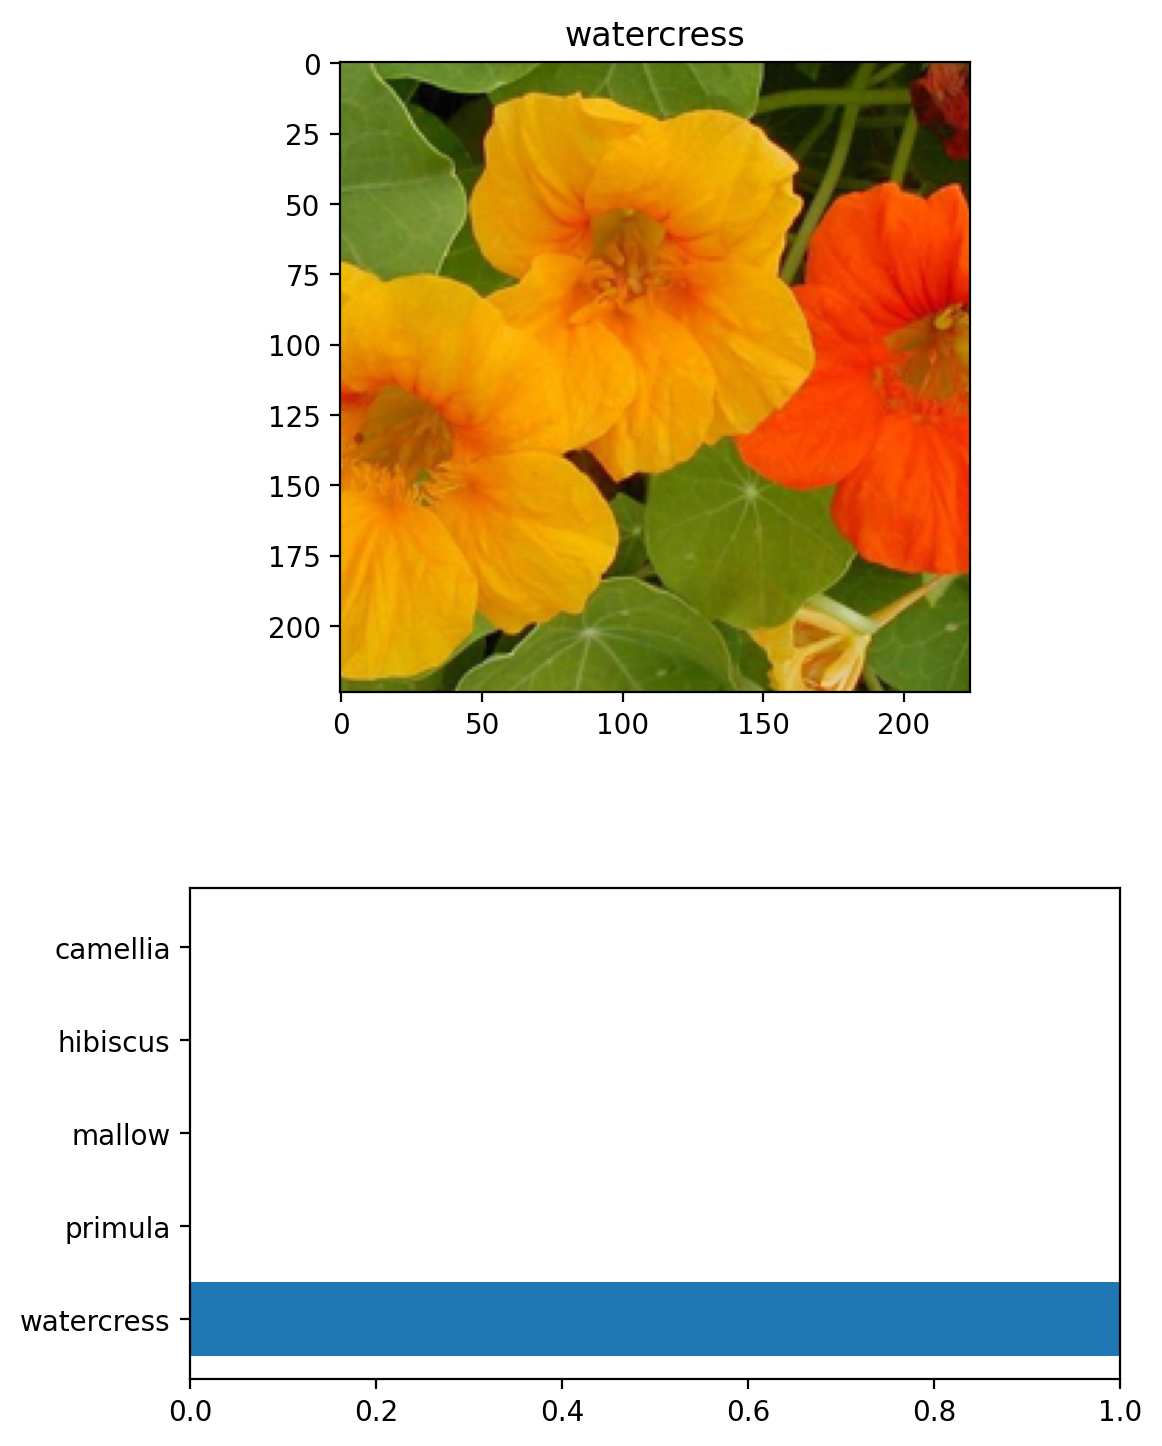

In [ ]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.'''
    model.eval()

    # Process image
    img = process_image(image_path)
    img_tensor = torch.from_numpy(img).type(torch.FloatTensor)
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

    # Move model and image tensor to the same device (CPU or CUDA)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    img_tensor = img_tensor.to(device)

    # Perform inference
    with torch.no_grad():
        output = model(img_tensor)

    # Get top K probabilities and indices
    probs, indices = torch.exp(output).topk(topk)

    # Convert to numpy arrays
    probs = probs.cpu().numpy().flatten()
    indices = indices.cpu().numpy().flatten()

    # Map indices to class labels
    class_to_idx = {v: k for k, v in model.class_to_idx.items()}
    classes = [class_to_idx[i] for i in indices]

    return probs, classes

def display_prediction(image_path, model, cat_to_name):
    '''Display an image along with the top 5 classes and their probabilities.'''
    probs, classes = predict(image_path, model)
    labels = [cat_to_name[str(cls)] for cls in classes]

    # Plot image
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), nrows=2)
    image = process_image(image_path)
    imshow(torch.tensor(image), ax=ax1)
    ax1.set_title(labels[0])

    # Plot probability bar chart
    ax2.barh(labels, probs)
    ax2.set_aspect(0.1)
    ax2.set_yticks(labels)
    ax2.set_yticklabels(labels)
    ax2.set_xlim(0, 1)

    plt.show()

   # Define the folder containing images
import random

# Define the root folder containing images
image_folder = "/content/flowers"

# Recursively search for images in all subdirectories
image_files = []
for root, _, files in os.walk(image_folder):  # Walk through all directories
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(os.path.join(root, file))  # Store full path

# Select a random image from the list
if image_files:
    image_path = random.choice(image_files)  # Select a random image
    print(f"Selected Image: {image_path}")

    # Run prediction and display image
    display_prediction(image_path, model, cat_to_name)
else:
    print("Error: No images found in the folder.")


